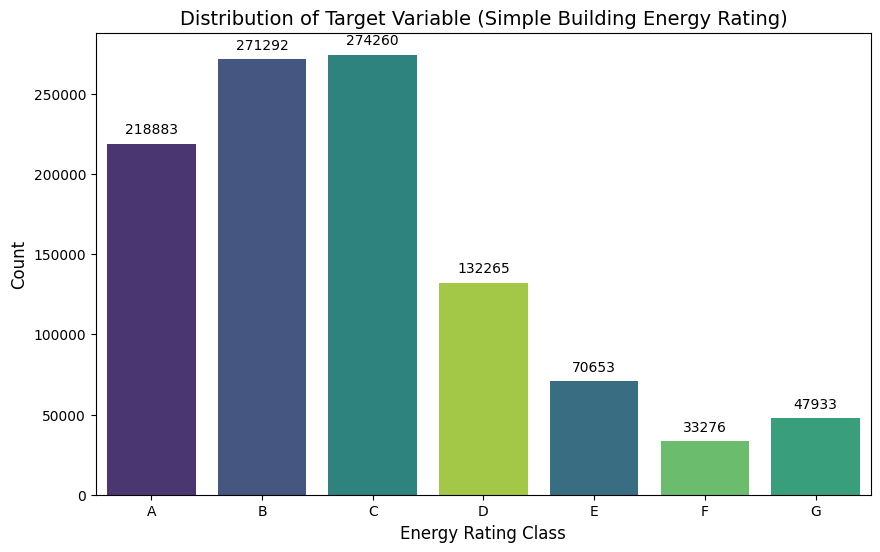

Class Distribution:
Simple_Building_Energy_Rating
A    218883
B    271292
C    274260
D    132265
E     70653
F     33276
G     47933
Name: count, dtype: int64


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load the pre-cleaned dataset
df = pd.read_csv('../data/processed/cleaned_data_step1.csv')

#Task1 Target variable analysis

plt.figure(figsize=(10, 6))

ax = sns.countplot(
    x='Simple_Building_Energy_Rating', 
    data=df, 
    hue='Simple_Building_Energy_Rating', 
    legend=False, 
    palette='viridis',
    order=['A', 'B', 'C', 'D', 'E', 'F', 'G'] 
)

plt.title('Distribution of Target Variable (Simple Building Energy Rating)', fontsize=14)
plt.xlabel('Energy Rating Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points',
                    fontsize=10)

plt.show()

# Numerical Summary
print("Class Distribution:")
print(df['Simple_Building_Energy_Rating'].value_counts().sort_index())

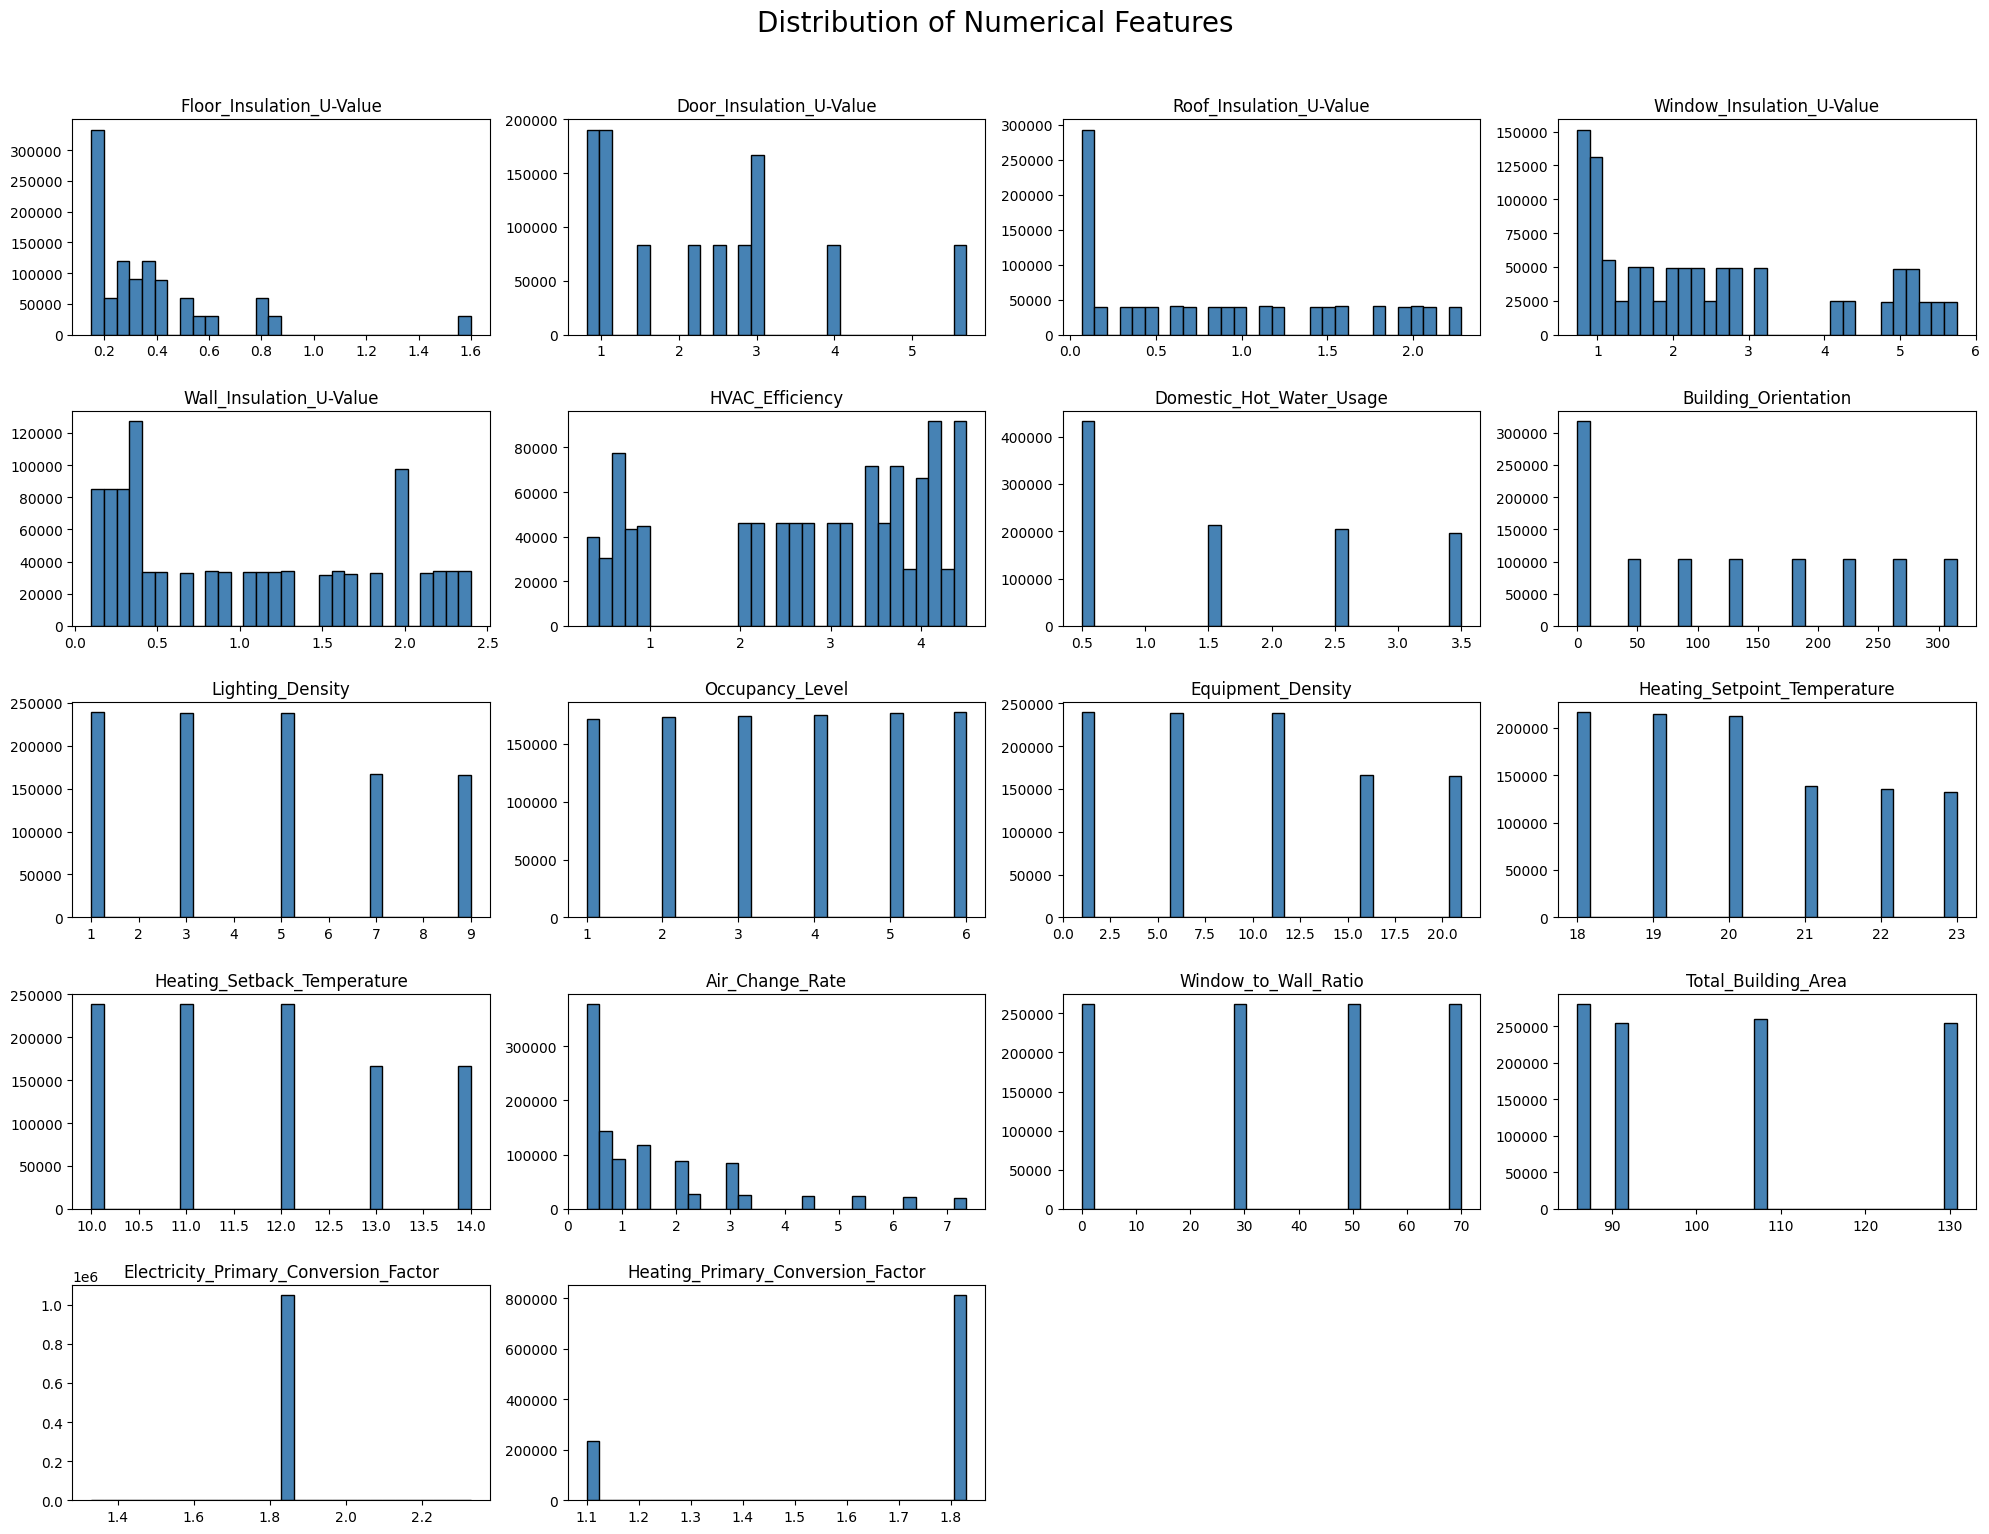

In [5]:
#Task2 creating distribution of numeric values

# 1. Select only numerical columns (float and int)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 2. Create histograms for all numerical columns

df[numeric_cols].hist(bins=30, figsize=(20, 15), color='steelblue', edgecolor='black', grid=False)

plt.suptitle('Distribution of Numerical Features', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

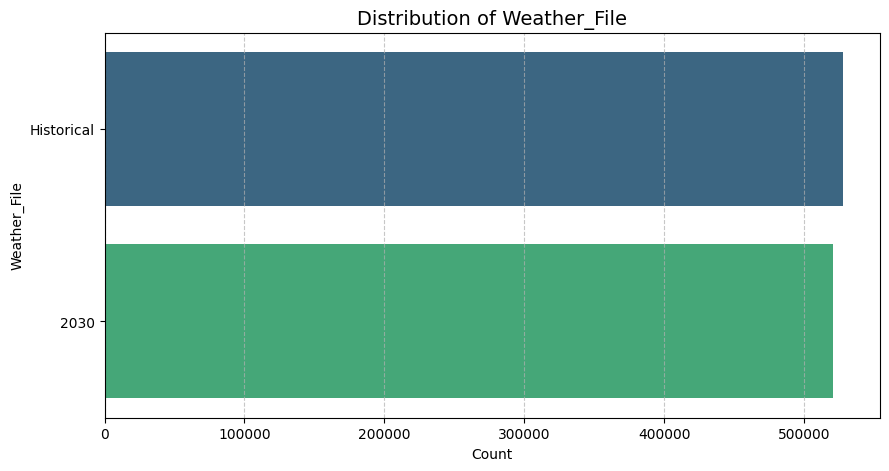

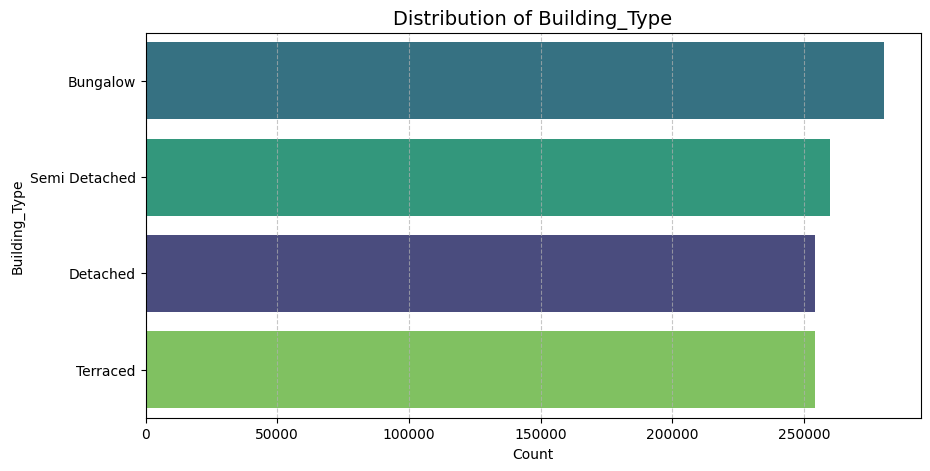

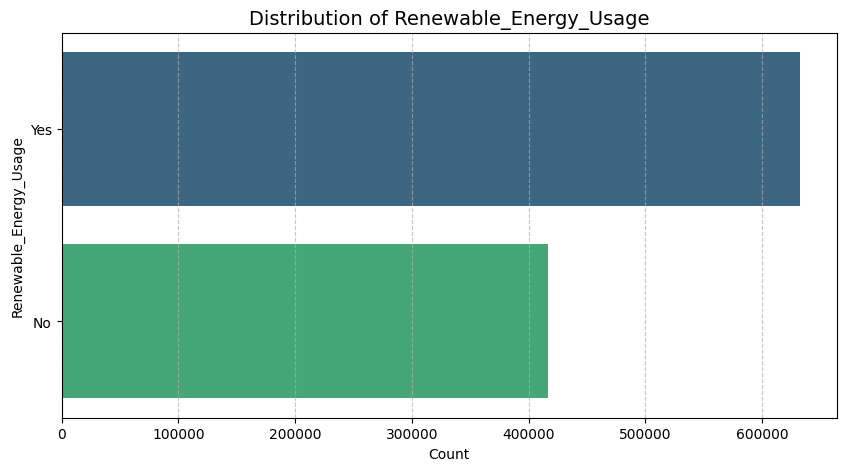

In [6]:
#Task3 categorical feture analysis

# 1. Select categorical columns (object type)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# 2. Remove the Target Variable from this list (since we analyzed it in Task 1)
if 'Simple_Building_Energy_Rating' in categorical_cols:
    categorical_cols.remove('Simple_Building_Energy_Rating')

# 3. Plot a countplot for each categorical feature
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    
    # Plotting
    # We use 'y=col' for horizontal bars which are easier to read for long labels
    # order: Sorts the bars from most frequent to least frequent
    sns.countplot(
        y=col, 
        data=df, 
        order=df[col].value_counts().index, 
        palette='viridis',
        hue=col,        # Fix for the FutureWarning
        legend=False    # Fix for the FutureWarning
    )
    
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()